In [1]:
# make all neccessary imports

import cbpro as cb
from cbpro.public_client import PublicClient
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# initialize the public client
pub = PublicClient()

# get data
dat = pd.DataFrame(pub.get_product_historic_rates(product_id='BTC-EUR'),
                   columns=['time','low','high','open','close','volume'])

# perform EDA on the retrieved data
dat.head()

,time,low,high,open,close,volume
0,1665060000,20539.96,20568.63,20554.78,20539.96,0.170333
1,1665059940,20560.46,20572.29,20572.29,20563.37,0.072092
2,1665059880,20558.50,20564.29,20558.50,20564.29,0.129142
3,1665059820,20555.74,20572.00,20555.95,20565.15,0.544595
4,1665059760,20558.76,20574.82,20574.82,20558.76,0.375491


In [3]:
# data wrangling
# extract the needed variable (columns) and convert to numpy arrays for easy manipulation
price = dat['close'].array 
pricechange = price[1:]-price[:-1]
pricechange = np.hstack((np.array([np.nan]),pricechange))
dat['pricechange'] = pricechange

      price        size  high
0  20514.56      0.0305     1
1  20513.53  0.24138648     1
2  20513.01  0.24986182     1
3  20512.28   0.2005966     1
4  20511.13  0.14864288     1
       price        size  high
95     20690    0.018233     1
96  20698.85  0.00009318     1
97  20699.14  0.00186124     1
98     20700  1.57090521     7
99  20701.22  0.69707851     1
20386.609099999998
20588.917200000007


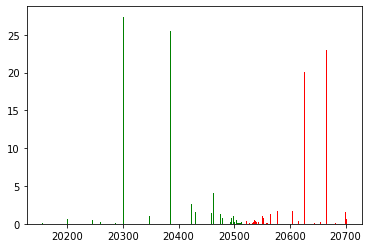

In [4]:
# pd.DataFrame(pub.get_product_order_book(product_id='BTC-EUR', level=2),
#             columns=['time','low','high'])

bids = pub.get_product_order_book(product_id='BTC-EUR', level=2)['bids']
asks = pub.get_product_order_book(product_id='BTC-EUR', level=2)['asks']

bids = pd.DataFrame(bids, columns=['price','size','high'])[:100]
asks = pd.DataFrame(asks, columns=['price','size','high'])[:100]
print(bids.head())
print(asks.tail())

bid_vol = bids.price.astype(float) * bids.size.astype('float')
ask_vol = asks.price.astype(float) * asks.size.astype('float')

print(bids['price'][:100].astype('float').mean())
print(asks['price'][:100].astype('float').mean())

x = np.linspace(0,100,num=100)
plt.bar(bids['price'][:100].astype('float'), bids['size'][:100].astype('float'), color='green') # buyers
plt.bar(asks['price'][:100].astype('float'), asks['size'][:100].astype('float'), color='red') # sellers
plt.show()

In [5]:
pub.get_product_ticker(product_id='BTC-EUR')

{'ask': '20520.28',
 'bid': '20513.03',
 'volume': '408.85362925',
 'trade_id': 67915116,
 'price': '20526.34',
 'size': '0.00759221',
 'time': '2022-10-06T12:45:47.596853Z'}

In [6]:
data = pub.get_product_trades(product_id='BTC-EUR', before='2022-09-13 12:00:00',
                        after='2022-09-13 12:02:00', limit=None, result=None)

trades = []
while True:
    if len(trades) >= 500:
        break
    trades.append(next(data))
data = pd.DataFrame(trades)[:450]
data['price'] = data['price'].astype('float')
data['size'] = data['size'].astype('float')
buy = data[(data.side == 'buy')]
#print(buy)

sell = data[(data.side == 'sell')]
#print(sell)
print(data)
print(buy.shape)
print(sell.shape)

                            time  trade_id     price      size  side
0    2022-10-06T12:45:47.596853Z  67915116  20526.34  0.007592   buy
1    2022-10-06T12:45:29.699094Z  67915115  20532.67  0.046303  sell
2    2022-10-06T12:45:19.376133Z  67915114  20532.64  0.000047  sell
3    2022-10-06T12:45:17.801665Z  67915113  20532.67  0.000097  sell
4     2022-10-06T12:45:17.43189Z  67915112  20532.67  0.003400  sell
..                           ...       ...       ...       ...   ...
445  2022-10-06T11:52:57.373711Z  67914671  20500.00  0.007250  sell
446  2022-10-06T11:52:57.373711Z  67914670  20500.00  0.050000  sell
447  2022-10-06T11:52:44.933281Z  67914669  20493.41  0.000253   buy
448  2022-10-06T11:52:44.017365Z  67914668  20499.00  0.023652  sell
449  2022-10-06T11:52:44.017365Z  67914667  20499.00  0.002000  sell

[450 rows x 5 columns]
(161, 5)
(289, 5)


In [38]:
size= data[['time','size', 'side']]
size=size.groupby(['time', 'side']).sum()[::-1]
tmp = size.index
size.index,size['side'] = tmp.get_level_values('time'),tmp.get_level_values('side')
size

,size,side
time,,
2022-10-06T12:45:47.596853Z,0.007592,buy
2022-10-06T12:45:29.699094Z,0.046303,sell
2022-10-06T12:45:19.376133Z,0.000047,sell
2022-10-06T12:45:17.801665Z,0.000097,sell
2022-10-06T12:45:17.43189Z,0.003400,sell
...,...,...
2022-10-06T11:53:06.124838Z,0.004873,sell
2022-10-06T11:52:57.434579Z,0.059812,sell
2022-10-06T11:52:57.373711Z,0.226620,sell


In [41]:
price = data[['time','price', 'side']]
price = price.groupby(['time']).first()[::-1]
print(price)

                                price  side
time                                       
2022-10-06T12:45:47.596853Z  20526.34   buy
2022-10-06T12:45:29.699094Z  20532.67  sell
2022-10-06T12:45:19.376133Z  20532.64  sell
2022-10-06T12:45:17.801665Z  20532.67  sell
2022-10-06T12:45:17.43189Z   20532.67  sell
...                               ...   ...
2022-10-06T11:53:06.124838Z  20504.25  sell
2022-10-06T11:52:57.434579Z  20504.70  sell
2022-10-06T11:52:57.373711Z  20500.00  sell
2022-10-06T11:52:44.933281Z  20493.41   buy
2022-10-06T11:52:44.017365Z  20499.00  sell

[353 rows x 2 columns]


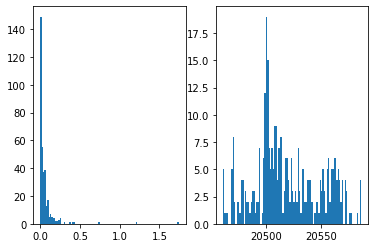

In [87]:
fig, axs = plt.subplots(1,2)
axs[0].hist(size['size'], bins=100)
axs[1].hist(price['price'], bins=100)
plt.show()

In [37]:
size.index.get_level_values('side')

Index(['buy', 'sell', 'sell', 'sell', 'sell', 'sell', 'buy', 'sell', 'buy',
       'buy',
       ...
       'sell', 'buy', 'sell', 'sell', 'sell', 'sell', 'sell', 'sell', 'buy',
       'sell'],
      dtype='object', name='side', length=353)

In [10]:
# find b as discussed
import datetime as dt
n = len(price)
times = pd.to_datetime(data['time'])
# dt.datetime(time_diff)
diff = times.iloc[0] - times.iloc[-1]
diff = diff.total_seconds()

b = (n-1)/diff
1/b


9.04425990909091

In [12]:
timesnew = pd.DataFrame(size,price)

0     2022-10-06 12:45:47.596853+00:00
1     2022-10-06 12:45:29.699094+00:00
2     2022-10-06 12:45:19.376133+00:00
3     2022-10-06 12:45:17.801665+00:00
4     2022-10-06 12:45:17.431890+00:00
                    ...               
445   2022-10-06 11:52:57.373711+00:00
446   2022-10-06 11:52:57.373711+00:00
447   2022-10-06 11:52:44.933281+00:00
448   2022-10-06 11:52:44.017365+00:00
449   2022-10-06 11:52:44.017365+00:00
Name: time, Length: 450, dtype: datetime64[ns, UTC]

In [44]:
pb = price[price['side']=='buy']
ps = price[price['side']=='sell']

23.751220686567162


(0, 10)

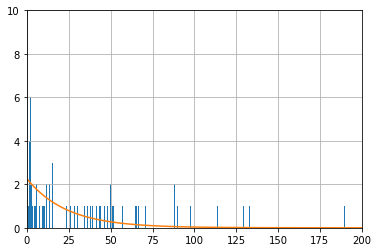

In [86]:
timeb = pd.to_datetime(pb.index)
pd.Series((timeb[:-1]-timeb[1:]).total_seconds()).hist(bins=500)
bb = (timeb.shape[0]-1)/(timeb[0]-timeb[-1]).total_seconds()
print(1/bb)
tmp = np.arange(0,200,0.01)
plt.plot(tmp,bb*np.exp(-bb*tmp)*(timeb.shape[0]-1)*200/500)
plt.xlim((0,200))
plt.ylim((0,10))

14.588395064516128


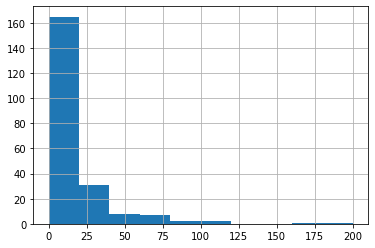

In [67]:
times = pd.to_datetime(ps.index)
pd.Series((times[:-1]-times[1:]).total_seconds()).hist()
bs = (times.shape[0]-1)/(times[0]-times[-1]).total_seconds()
print(1/bs)